# Model comparison study - k-eps, lowRe k-eps, and laminar flow models

## COMSOL files run40_keps_final_02.mph, run40_lam_final_02_out.mph, run40_lowRe_final_02_out_out.mph

- /Users/hkromer/02_PhD/02_Data/01_COMSOL/cfd/03.lowRe_vs_kep/run40_lowRe_final_02_out_out.mph

The objective is to show that the laminar model (or low Re where the Reynolds number is in the transition regime) is good to chose

- 2 mm FWHM spot
- 200 mm domain length
- 40 mm outer diameter of target
- 2.675 mm coolant channel
- 3 mm CuOFE layer
- 5 e-6 m Ti layer
- 3 l/min flow arte water
- 300 W beam power
- 70 rpm rotational speed
- 20 degC water inlet temperature
- k-epsilon, lowReynolds k-epsilon, and laminar flow interfaces

In [71]:
import numpy as np
import os
import re
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from scipy import interpolate

In [72]:
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2018/bin/x86_64-darwin'
plt.rc('text', usetex=True)
plt.rc('font', weight='bold')
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'
matplotlib.rcParams['mathtext.it'] = 'Arial:italic'
matplotlib.rcParams['mathtext.bf'] = 'Arial:bold'
matplotlib.rcParams['mathtext.tt'] = 'Arial'
matplotlib.rcParams['mathtext.cal'] = 'Arial'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{sfmath} \boldmath']

In [73]:
folder = '/Users/hkromer/02_PhD/02_Data/01_COMSOL/cfd/03.lowRe_vs_kep/data/' 

In [74]:
files = [s for s in os.listdir(folder) if s.endswith('csv')]
files_alongFluidCenterline = [s for s in os.listdir(folder) if 'alongFluidCenterline' in s]
files_alongZ = [s for s in os.listdir(folder) if 'alongZ' in s]
files_alongSurface = [s for s in os.listdir(folder) if 'alongOuterSurface' in s]
print(files_alongZ)
print(files_alongSurface)
print(files_alongFluidCenterline)

['run40_lowRe_final_02.alongZ.csv', 'run40_lam_final_02.alongZ.csv', 'run40_lam_final_02.alongZ.txt.csv', 'run40_keps_final_02.alongZ.csv']
['run40_lowRe_final_02.alongOuterSurface.csv', 'run40_keps_final_02.alongOuterSurface.csv', 'run40_lam_final_02.alongOuterSurface.csv']
['run40_lam_final_02.alongFluidCenterline.csv', 'run40_keps_final_02.alongFluidCenterline.csv', 'run40_lowRe_final_02.alongFluidCenterline.csv']


## Processing of the data along fluid centerline

In [75]:
lst_df = []
for file in files_alongFluidCenterline:
    df = pd.read_csv(f'{folder}/{file}', skiprows=8)
    df.columns = ['x', 'y', 'z', 'U', 'T']  # x in mm, y in mm, z in mm, U (velocity magnitude) in m/s, T in K
    df['T_degC'] = df['T'] - 273.15
    model = re.findall(r'run40_(\w+)_final', file)[0]
    df['model'] = model

    df['model'] = df['model'].astype('category')

    lst_df.append(df)
    
df_all = pd.concat(lst_df)
df_all.info()
df_all.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 100
Data columns (total 7 columns):
x         303 non-null float64
y         303 non-null int64
z         303 non-null float64
U         303 non-null float64
T         303 non-null float64
T_degC    303 non-null float64
model     303 non-null object
dtypes: float64(5), int64(1), object(1)
memory usage: 18.9+ KB


,x,y,z,U,T,T_degC,model
0,196.666667,0,-15.6575,0.281758,293.227500,20.077500,lam
1,200.000000,0,-15.6575,0.283180,293.226407,20.076407,lam
2,193.387755,0,-15.6575,0.281245,293.225482,20.075482,lam
3,190.163265,0,-15.6575,0.281103,293.220114,20.070114,lam
4,186.993197,0,-15.6575,0.280952,293.216047,20.066047,lam


### Temperature plot along fluid centerline

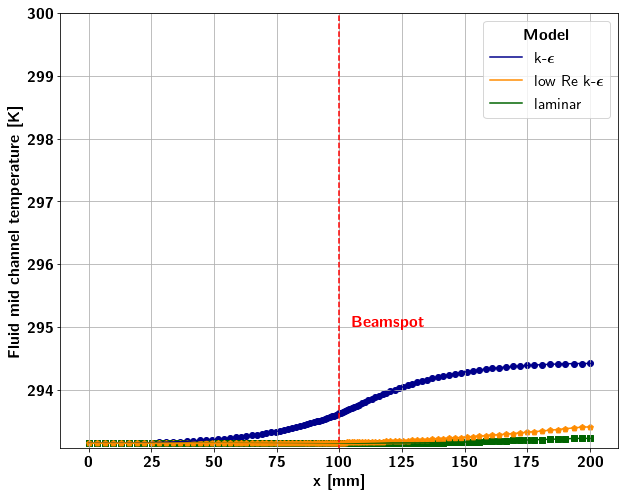

In [76]:
models = df_all['model'].unique().tolist()
models = sorted(models)

colors = ['darkblue', 'darkgreen', 'darkorange']
markers = ['o', 's', 'p']
fs = 16
ls = 16

plt.figure(figsize=(10,8))
for model, c, m  in zip(models, colors, markers):
    if model == 'keps':
        lbl = r'k-$\epsilon$'
    if model == 'lam':
        lbl = r'laminar'
    if model == 'lowRe':
        lbl = r'low Re k-$\epsilon$'
    this_df = df_all[ df_all['model'] == model ]
    # sort along x
    this_df = this_df.sort_values(by=['x'])
    
    # plot
    plt.scatter(this_df['x'], this_df['T'], c=c, marker=m, label=None)
    plt.plot(this_df['x'], this_df['T'], c=c, label=f'{lbl}')

ax = plt.gca()
ylim = ax.get_ylim()
plt.plot([100, 100], [-1000, 1000], color='red', linestyle='--')
# plt.plot([-20, -20], [-10, 10], color='black', linestyle='--')
# plt.plot([-15, -15], [-10, 10], color='black', linestyle='--')
# plt.ylim(ylim)
plt.ylim(ylim[0], 300)
ax.tick_params(axis = 'both', which = 'major', labelsize = ls)
ax.text(105, 295, r'\textbf{Beamspot}', color='red', fontsize=fs)
plt.grid()
plt.xlabel(r'\textbf{x [mm]}', fontsize=fs)
plt.ylabel(r'\textbf{Fluid mid channel temperature [K]}', fontsize=fs)
handles,labels = ax.get_legend_handles_labels()

handles = [handles[0], handles[2], handles[1]]
labels = [labels[0], labels[2], labels[1]]

legend = ax.legend(handles,labels,title=r'\textbf{Model}',loc='upper right', fontsize=fs)
plt.setp(legend.get_title(),fontsize=fs)
# plt.title('Mesh refinement')
plt.savefig(f'{folder}/along_fluid_centerline_T.png', dpi=600)
plt.savefig(f'{folder}/along_fluid_centerline_T.pdf', dpi=600)
plt.show()

### Velocity magnitude plot along fluid centerline

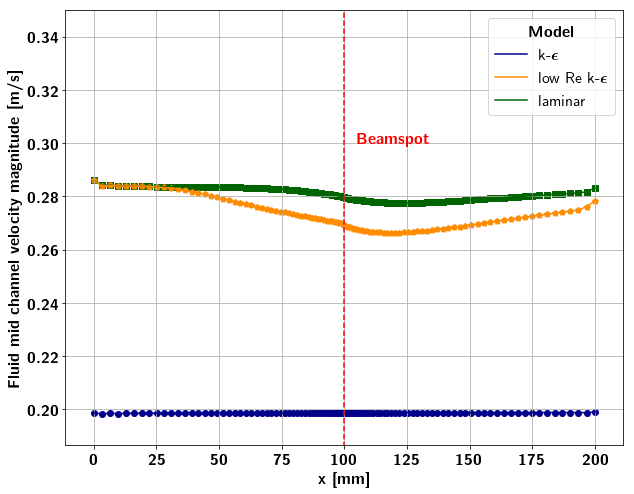

In [77]:
models = df_all['model'].unique().tolist()
models = sorted(models)

colors = ['darkblue', 'darkgreen', 'darkorange']
markers = ['o', 's', 'p']
fs = 16
ls = 16

plt.figure(figsize=(10,8))
for model, c, m  in zip(models, colors, markers):
    if model == 'keps':
        lbl = r'k-$\epsilon$'
    if model == 'lam':
        lbl = r'laminar'
    if model == 'lowRe':
        lbl = r'low Re k-$\epsilon$'
    this_df = df_all[ df_all['model'] == model ]
    # sort along x
    this_df = this_df.sort_values(by=['x'])
    
    # plot
    plt.scatter(this_df['x'], this_df['U'], c=c, marker=m, label=None)
    plt.plot(this_df['x'], this_df['U'], c=c, label=f'{lbl}')

ax = plt.gca()
ylim = ax.get_ylim()
plt.plot([100, 100], [-1000, 1000], color='red', linestyle='--')
# plt.plot([-20, -20], [-10, 10], color='black', linestyle='--')
# plt.plot([-15, -15], [-10, 10], color='black', linestyle='--')
# plt.ylim(ylim)
plt.ylim(ylim[0], 0.35)
ax.tick_params(axis = 'both', which = 'major', labelsize = ls)
ax.text(105, 0.3, r'\textbf{Beamspot}', color='red', fontsize=fs)
plt.grid()
plt.xlabel(r'\textbf{x [mm]}', fontsize=fs)
plt.ylabel(r'\textbf{Fluid mid channel velocity magnitude [m/s]}', fontsize=fs)
handles,labels = ax.get_legend_handles_labels()

handles = [handles[0], handles[2], handles[1]]
labels = [labels[0], labels[2], labels[1]]

legend = ax.legend(handles,labels,title=r'\textbf{Model}',loc='upper right', fontsize=fs)
plt.setp(legend.get_title(),fontsize=fs)
# plt.title('Mesh refinement')
plt.savefig(f'{folder}/along_fluid_centerline_U.png', dpi=600)
plt.savefig(f'{folder}/along_fluid_centerline_U.pdf', dpi=600)
plt.show()

## Processing of the data along outer surface

In [78]:
lst_df = []
for file in files_alongSurface:
    df = pd.read_csv(f'{folder}/{file}', skiprows=8)
    df.columns = ['x', 'y', 'z', 'T']  # x in mm, y in mm, z in mm, T in K
    df['T_degC'] = df['T'] - 273.15
    model = re.findall(r'run40_(\w+)_final', file)[0]
    df['model'] = model

    df['model'] = df['model'].astype('category')

    lst_df.append(df)
    
df_all = pd.concat(lst_df)
df_all.info()
df_all.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 100
Data columns (total 6 columns):
x         303 non-null float64
y         303 non-null int64
z         303 non-null int64
T         303 non-null float64
T_degC    303 non-null float64
model     303 non-null object
dtypes: float64(3), int64(2), object(1)
memory usage: 16.6+ KB


,x,y,z,T,T_degC,model
0,196.666667,0,-20,294.460123,21.310123,lowRe
1,200.000000,0,-20,293.153923,20.003923,lowRe
2,193.387755,0,-20,295.564932,22.414932,lowRe
3,190.163265,0,-20,296.539288,23.389288,lowRe
4,186.993197,0,-20,297.396511,24.246511,lowRe


### Temperature along outer surface

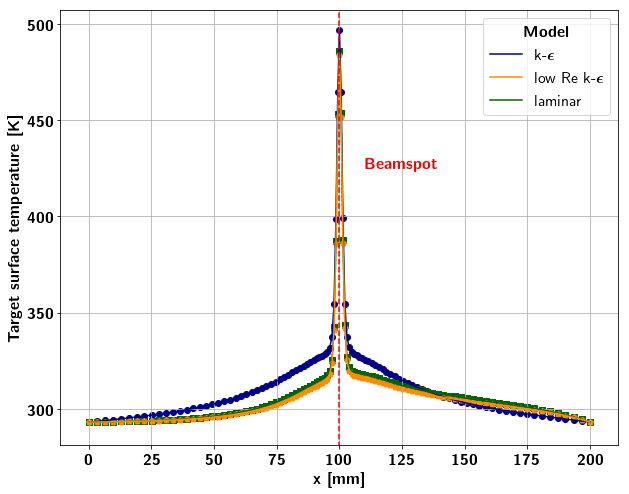

In [79]:
models = df_all['model'].unique().tolist()
models = sorted(models)

colors = ['darkblue', 'darkgreen', 'darkorange']
markers = ['o', 's', 'p']
fs = 16
ls = 16

plt.figure(figsize=(10,8))
for model, c, m  in zip(models, colors, markers):
    if model == 'keps':
        lbl = r'k-$\epsilon$'
    if model == 'lam':
        lbl = r'laminar'
    if model == 'lowRe':
        lbl = r'low Re k-$\epsilon$'
    this_df = df_all[ df_all['model'] == model ]
    # sort along x
    this_df = this_df.sort_values(by=['x'])
    
    # plot
    plt.scatter(this_df['x'], this_df['T'], c=c, marker=m, label=None)
    plt.plot(this_df['x'], this_df['T'], c=c, label=f'{lbl}')

ax = plt.gca()
ylim = ax.get_ylim()
plt.plot([100, 100], [-1000, 1000], color='red', linestyle='--')
# plt.plot([-20, -20], [-10, 10], color='black', linestyle='--')
# plt.plot([-15, -15], [-10, 10], color='black', linestyle='--')
# plt.ylim(ylim)
plt.ylim(ylim)
ax.tick_params(axis = 'both', which = 'major', labelsize = ls)
ax.text(110, 425, r'\textbf{Beamspot}', color='red', fontsize=fs)
plt.grid()
plt.xlabel(r'\textbf{x [mm]}', fontsize=fs)
plt.ylabel(r'\textbf{Target surface temperature [K]}', fontsize=fs)
handles,labels = ax.get_legend_handles_labels()

handles = [handles[0], handles[2], handles[1]]
labels = [labels[0], labels[2], labels[1]]

legend = ax.legend(handles,labels,title=r'\textbf{Model}',loc='upper right', fontsize=fs)
plt.setp(legend.get_title(),fontsize=fs)
# plt.title('Mesh refinement')
plt.savefig(f'{folder}/along_outer_surface_T.png', dpi=600)
plt.savefig(f'{folder}/along_outer_surface_T.pdf', dpi=600)
plt.show()

## Processing of the data along z at beamspot

In [80]:
lst_df = []
for file in files_alongZ:
    df = pd.read_csv(f'{folder}/{file}', skiprows=8)
    df.columns = ['x', 'y', 'z', 'U', 'T']  # x in mm, y in mm, z in mm, U (velocity magnitude) in m/s, T in K
    df['T_degC'] = df['T'] - 273.15
    model = re.findall(r'run40_(\w+)_final', file)[0]
    df['model'] = model

    df['model'] = df['model'].astype('category')

    lst_df.append(df)
    
df_all = pd.concat(lst_df)
df_all.info()
df_all.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 0 to 25
Data columns (total 7 columns):
x         104 non-null int64
y         104 non-null int64
z         104 non-null float64
U         84 non-null float64
T         104 non-null float64
T_degC    104 non-null float64
model     104 non-null object
dtypes: float64(4), int64(2), object(1)
memory usage: 6.5+ KB


,x,y,z,U,T,T_degC,model
0,100,0,-19.9975,NaN,475.659559,202.509559,lowRe
1,100,0,-19.9950,NaN,467.475477,194.325477,lowRe
2,100,0,-20.0000,NaN,483.848996,210.698996,lowRe
3,100,0,-17.9950,NaN,329.202375,56.052375,lowRe
4,100,0,-16.9950,3.384241e-15,324.051007,50.901007,lowRe


### Temperature along z at beamspot

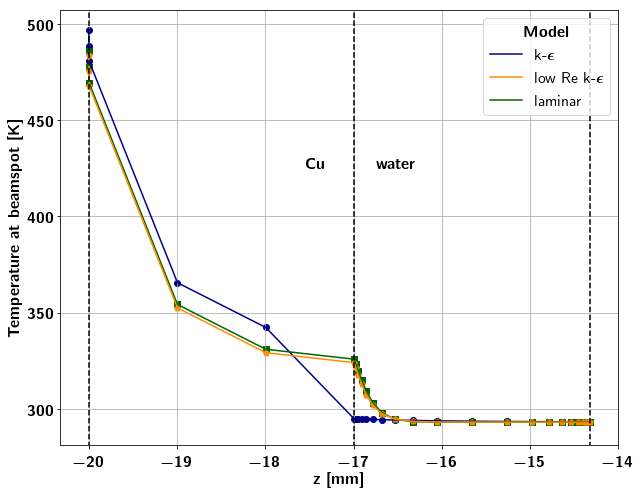

In [81]:
models = df_all['model'].unique().tolist()
models = sorted(models)

colors = ['darkblue', 'darkgreen', 'darkorange']
markers = ['o', 's', 'p']
fs = 16
ls = 16

plt.figure(figsize=(10,8))
for model, c, m  in zip(models, colors, markers):
    if model == 'keps':
        lbl = r'k-$\epsilon$'
    if model == 'lam':
        lbl = r'laminar'
    if model == 'lowRe':
        lbl = r'low Re k-$\epsilon$'
    this_df = df_all[ df_all['model'] == model ]
    # sort along x
    this_df = this_df.sort_values(by=['z'])
    
    # plot
    plt.scatter(this_df['z'], this_df['T'], c=c, marker=m, label=None)
    plt.plot(this_df['z'], this_df['T'], c=c, label=f'{lbl}')

ax = plt.gca()
ylim = ax.get_ylim()
# plt.plot([100, 100], [-1000, 1000], color='red', linestyle='--')
plt.plot([-20, -20], [-1e3, 1e3], color='black', linestyle='--')
plt.plot([-17, -17], [-1e3, 1e3], color='black', linestyle='--')
plt.plot([-17+2.675, -17+2.675], [-1e3, 1e3], color='black', linestyle='--')
# plt.ylim(ylim)
plt.ylim(ylim)
ax.tick_params(axis = 'both', which = 'major', labelsize = ls)
ax.text(-17.55, 425, r'\textbf{Cu}', color='black', fontsize=fs)
ax.text(-16.75, 425, r'\textbf{water}', color='black', fontsize=fs)
plt.grid()
plt.xlabel(r'\textbf{z [mm]}', fontsize=fs)
plt.ylabel(r'\textbf{Temperature at beamspot [K]}', fontsize=fs)
handles,labels = ax.get_legend_handles_labels()

handles = [handles[0], handles[2], handles[1]]
labels = [labels[0], labels[2], labels[1]]

legend = ax.legend(handles,labels,title=r'\textbf{Model}',loc='upper right', fontsize=fs)
plt.setp(legend.get_title(),fontsize=fs)
# plt.title('Mesh refinement')
plt.savefig(f'{folder}/along_z_at_beamspot_T.png', dpi=600)
plt.savefig(f'{folder}/along_z_at_beamspot_T.pdf', dpi=600)
plt.show()

### Velocity magnitude plot along z at beamspot

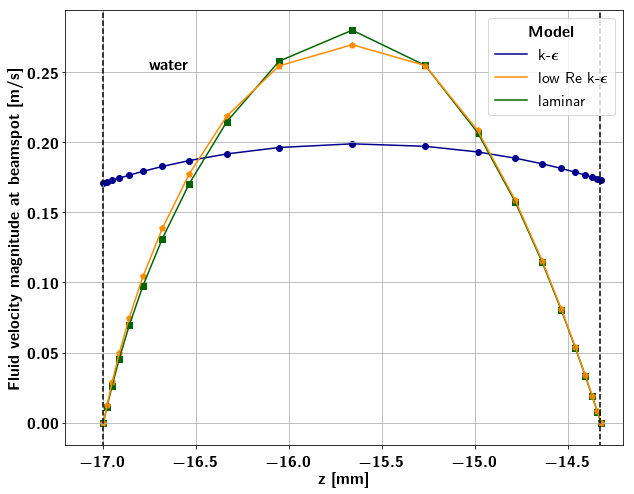

In [82]:
models = df_all['model'].unique().tolist()
models = sorted(models)

colors = ['darkblue', 'darkgreen', 'darkorange']
markers = ['o', 's', 'p']
fs = 16
ls = 16

plt.figure(figsize=(10,8))
for model, c, m  in zip(models, colors, markers):
    if model == 'keps':
        lbl = r'k-$\epsilon$'
    if model == 'lam':
        lbl = r'laminar'
    if model == 'lowRe':
        lbl = r'low Re k-$\epsilon$'
    this_df = df_all[ df_all['model'] == model ]
    # sort along x
    this_df = this_df.sort_values(by=['z'])
    
    # plot
    plt.scatter(this_df['z'], this_df['U'], c=c, marker=m, label=None)
    plt.plot(this_df['z'], this_df['U'], c=c, label=f'{lbl}')

ax = plt.gca()
ylim = ax.get_ylim()
# plt.plot([100, 100], [-1000, 1000], color='red', linestyle='--')
plt.plot([-20, -20], [-1e3, 1e3], color='black', linestyle='--')
plt.plot([-17, -17], [-1e3, 1e3], color='black', linestyle='--')
plt.plot([-17+2.675, -17+2.675], [-1e3, 1e3], color='black', linestyle='--')
plt.xlim(-17.2, -14.2)
plt.ylim(ylim)
ax.tick_params(axis = 'both', which = 'major', labelsize = ls)
# ax.text(-17.55, 425, r'\textbf{Cu}', color='black', fontsize=fs)
ax.text(-16.75, 0.252, r'\textbf{water}', color='black', fontsize=fs)
plt.grid()
plt.xlabel(r'\textbf{z [mm]}', fontsize=fs)
plt.ylabel(r'\textbf{Fluid velocity magnitude at beamspot [m/s]}', fontsize=fs)
handles,labels = ax.get_legend_handles_labels()

handles = [handles[0], handles[2], handles[1]]
labels = [labels[0], labels[2], labels[1]]

legend = ax.legend(handles,labels,title=r'\textbf{Model}',loc='upper right', fontsize=fs)
plt.setp(legend.get_title(),fontsize=fs)
# plt.title('Mesh refinement')
plt.savefig(f'{folder}/along_z_U.png', dpi=600)
plt.savefig(f'{folder}/along_z_U.pdf', dpi=600)
plt.show()